# Lab 7- Data Analysis

Exercises 1-4 are to be completed by Match 29th. The remaider of the lab is due April 5th. Before leaving lab today, everyone must download the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [1]:
#!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz

In [2]:
#!gunzip SUSY.csv.gz

In [3]:
ls -lh

total 2.3G
-rw-r--r-- 1 itsavu itsavu 997K Mar 30 16:29 Lab.7.SUSY.ipynb
-rw-r--r-- 1 itsavu itsavu 2.3G Mar 22 03:56 SUSY.csv


The data is provided as a comma separated file.

In [4]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [5]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [6]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [7]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [8]:
FeatureNames

['R',
 'dPhi_r_b',
 'M_R',
 'M_Delta_R',
 'S_R',
 'cos_theta_r1',
 'axial_MET',
 'MET_rel',
 'MT2',
 'M_TR_2']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [10]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [11]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [12]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


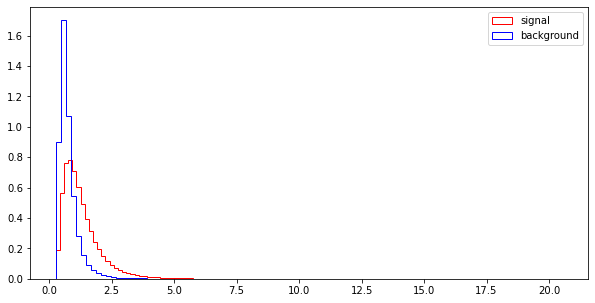

l_1_eta


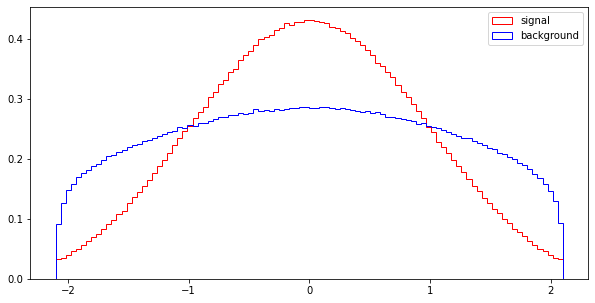

l_1_phi


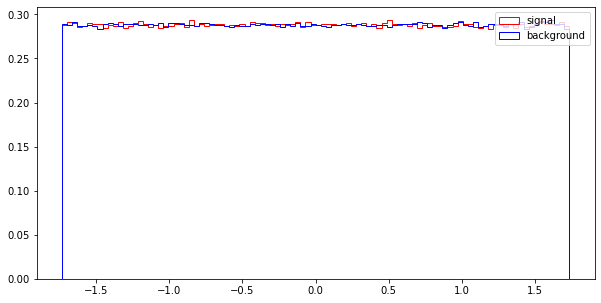

l_2_pT


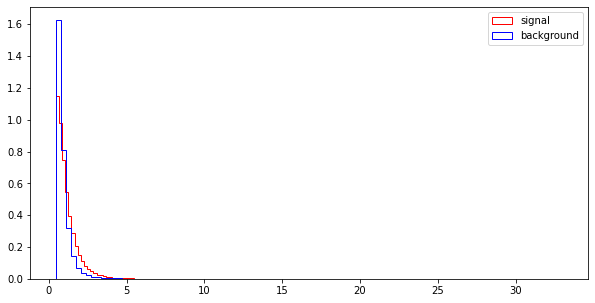

l_2_eta


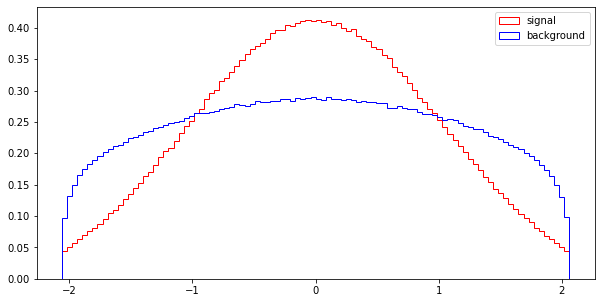

l_2_phi


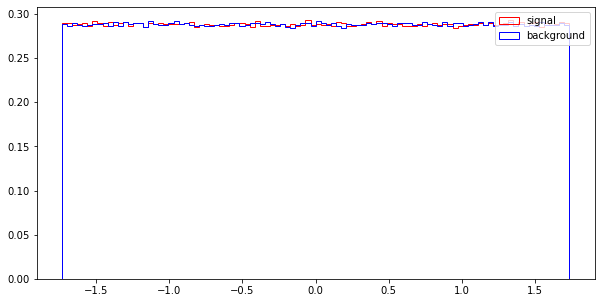

MET


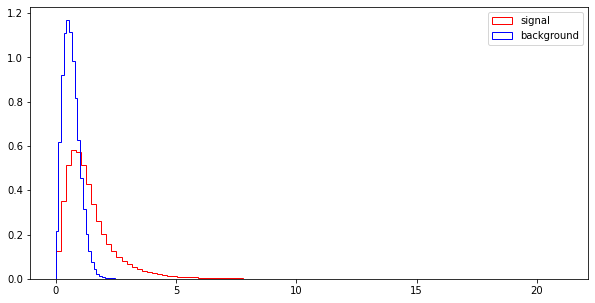

MET_phi


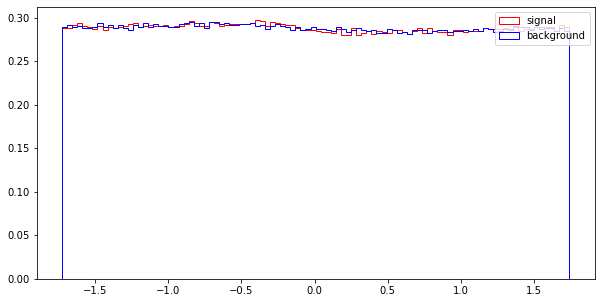

MET_rel


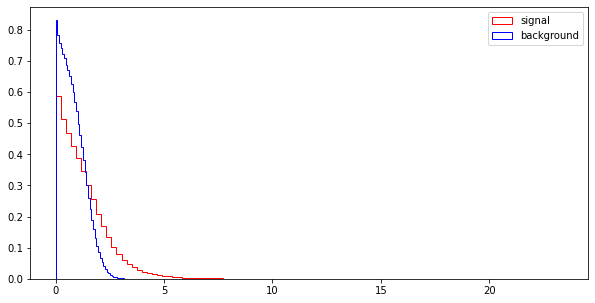

axial_MET


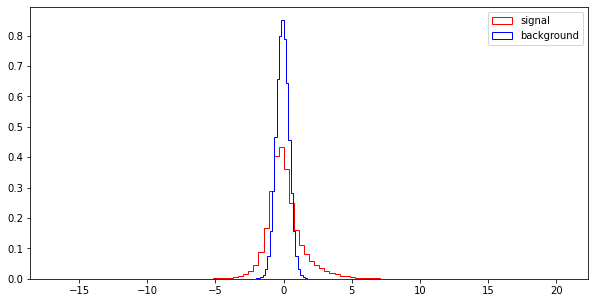

M_R


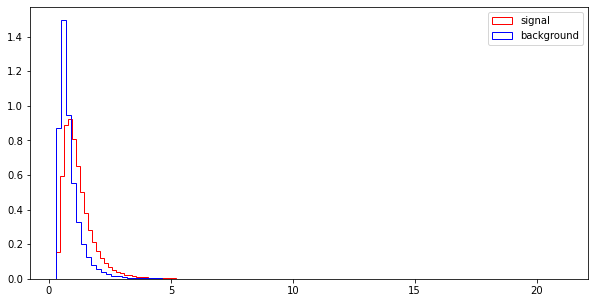

M_TR_2


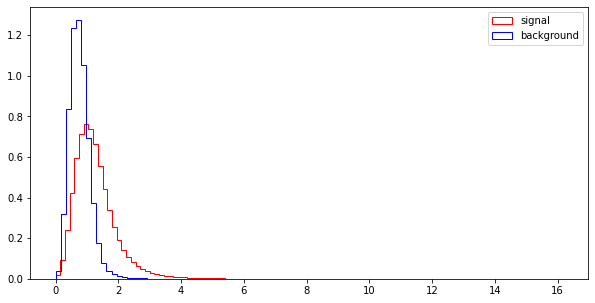

R


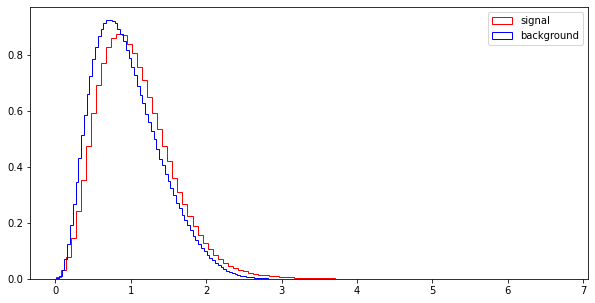

MT2


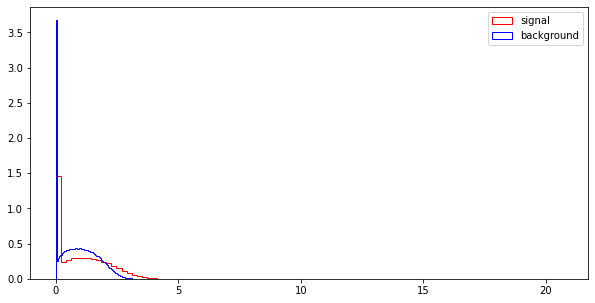

S_R


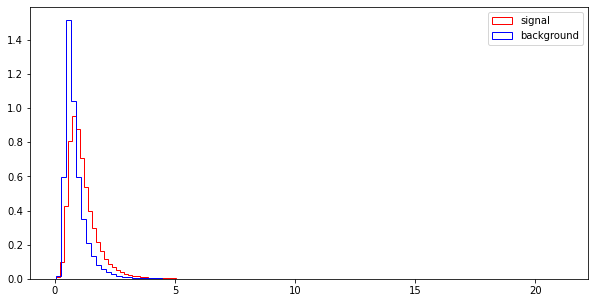

M_Delta_R


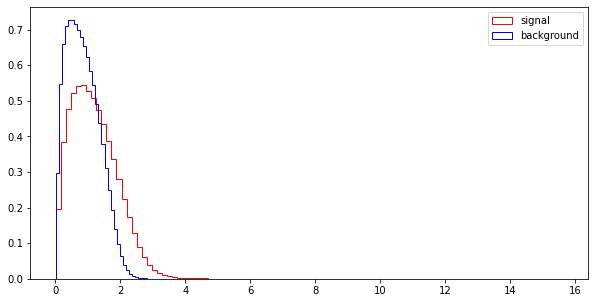

dPhi_r_b


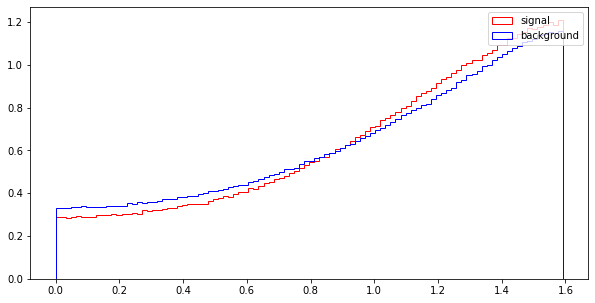

cos_theta_r1


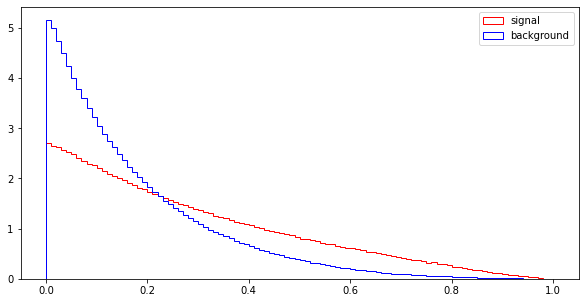

In [13]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

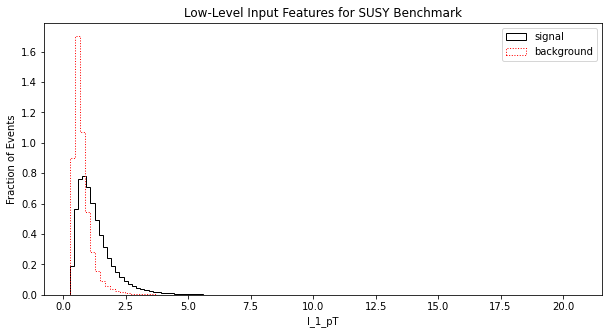

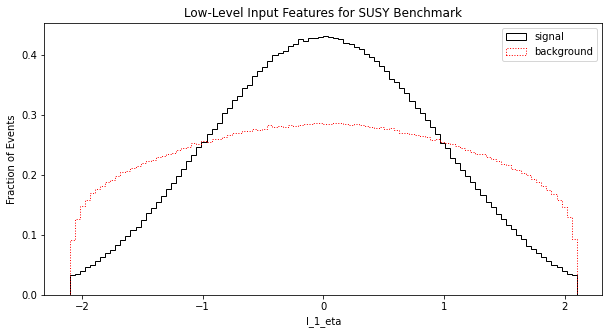

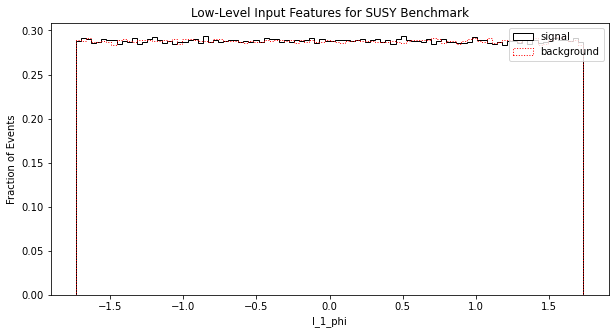

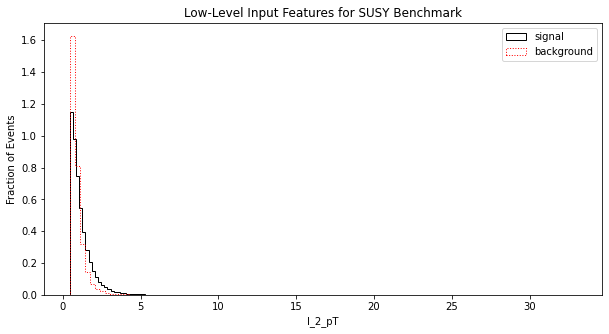

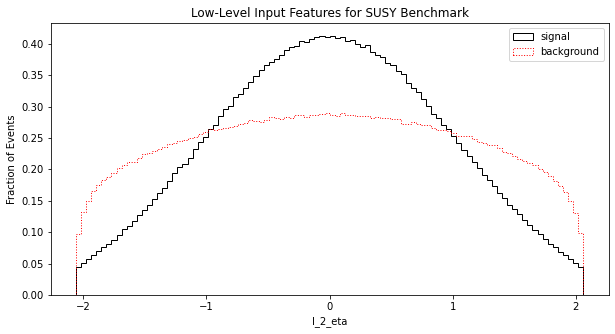

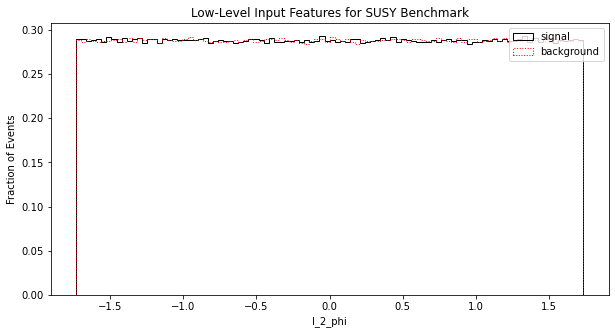

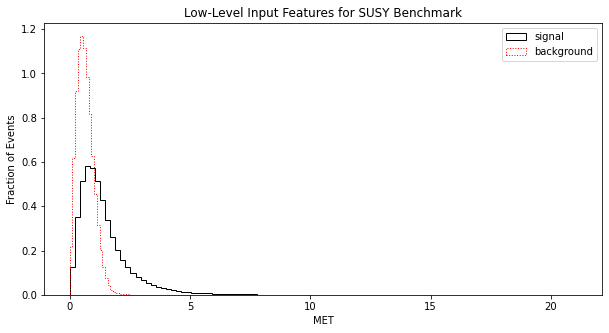

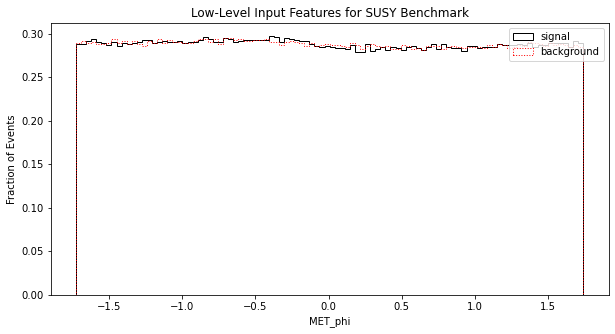

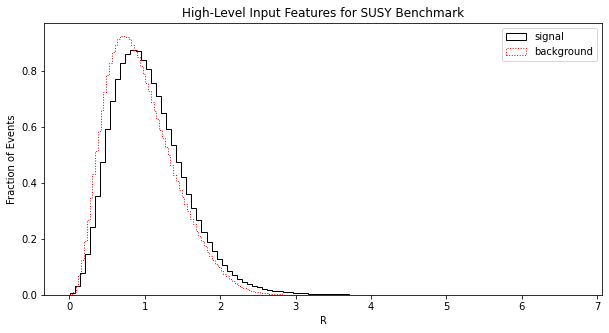

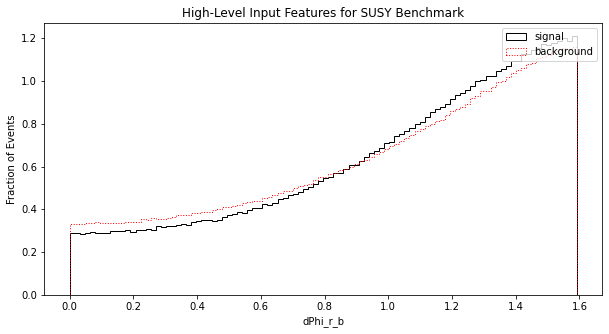

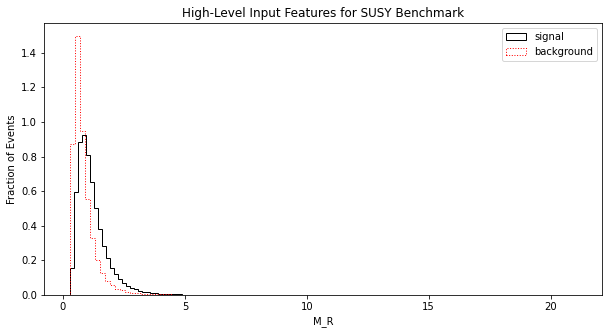

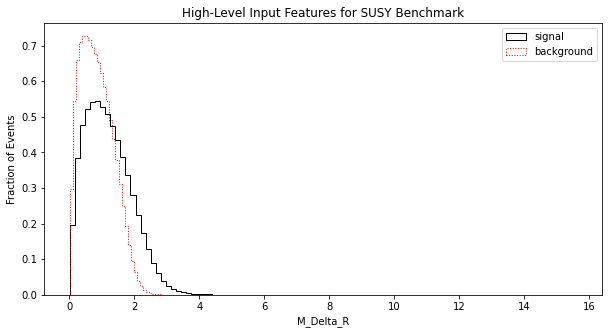

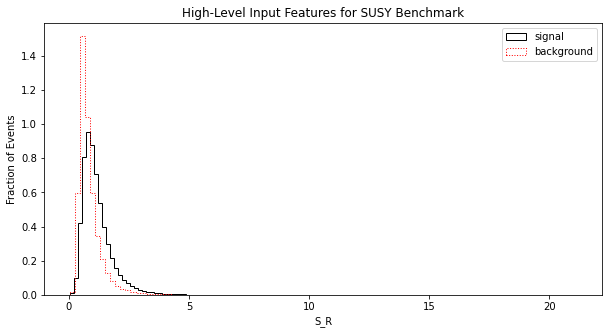

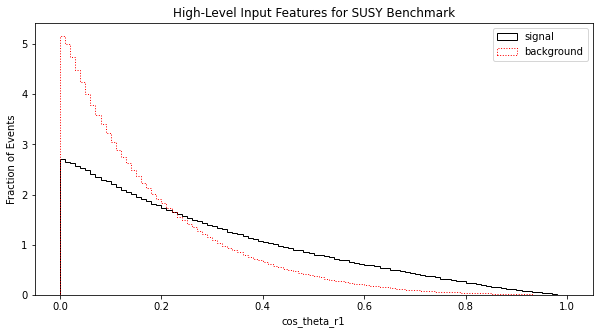

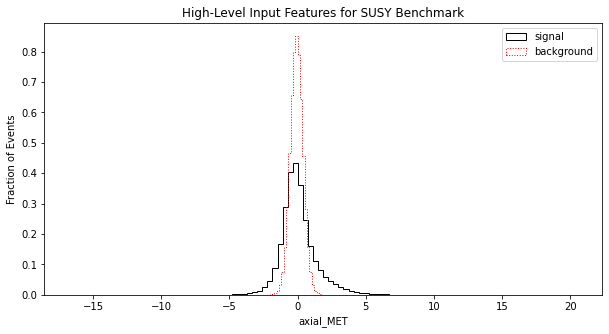

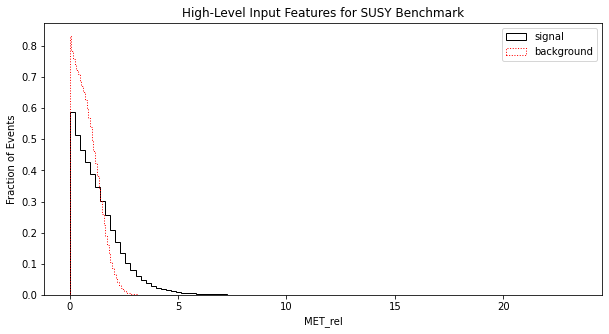

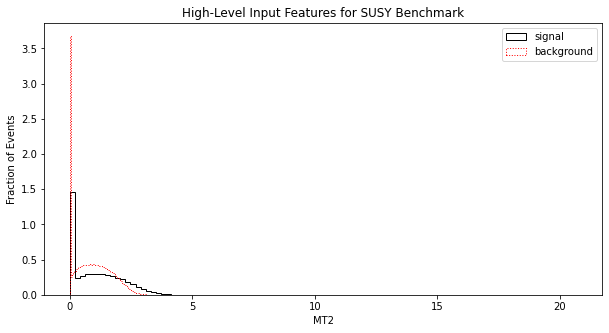

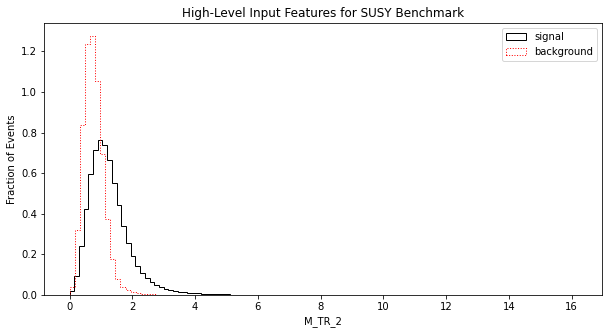

In [14]:
#figure 5: Distribution of low-level features in simulated samples for the SUSY signal (black) and background (red) benchmark processes.
for var in RawNames:
    plt.figure(figsize=(10,5))
    plt.title("Low-Level Input Features for SUSY Benchmark")
    plt.hist(np.array(df_sig[var]), bins=100, histtype="step", color="black", label="signal", density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]), bins=100, histtype="step", color="red", label="background", density=1, stacked=True, linestyle="dotted")
    plt.legend(loc="upper right")
    plt.xlabel(var)
    plt.ylabel("Fraction of Events")
plt.show()

#figure 6: Distribution of High-level features in simulated samples for the SUSY signal (black) and background (red) benchmark processes.
for var in FeatureNames:
    plt.figure(figsize=(10,5))
    plt.title("High-Level Input Features for SUSY Benchmark")
    plt.hist(np.array(df_sig[var]), bins=100, histtype="step", color="black", label="signal", density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]), bins=100, histtype="step", color="red", label="background", density=1, stacked=True, linestyle="dotted")
    plt.legend(loc="upper right")
    plt.xlabel(var)
    plt.ylabel("Fraction of Events")
plt.show()

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY and Higgs samples, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

In [15]:
#part a.1, created comparison functions to compare variables (inspired by lecture 13.a)--will be called in pairplot function for visualized comparison

def compare_dist(df, col_name, selections, **kwargs):
    for label, selection in selections.items():
        _=plt.hist(df[selection][col_name], label=label)
        
    _=plt.legend()

def compare_scatter(df, x_var_name, y_var_name, selections, make_legend=True):
    for label, selection in selections.items():
        _=plt.scatter(df[selection][x_var_name], df[selection][y_var_name], label=label)
        
    _=plt.xlabel(x_var_name)
    _=plt.ylabel(y_var_name)
    
    if make_legend:
        _=plt.legend()
        
#test
#compare_scatter(df, "L_1_pT", "L_2_pT", selection_dict)
    
def compare_hist(df, var1, var2):
    sig=df[df.signal==1]
    bkg=df[df.signal==0]
    

    plt.hist(np.array(df_sig[var1]), bins=100, histtype="step", color="black", label=var1, density=1, stacked=True)
    plt.hist(np.array(df_sig[var2]), bins=100, histtype="step", color="red", label=var2, density=1, stacked=True)

    plt.hist(np.array(df_bkg[var1]), bins=100, histtype="step", color="black", density=1, stacked=True, linestyle="dotted")
    plt.hist(np.array(df_bkg[var2]), bins=100, histtype="step", color="red", density=1, stacked=True, linestyle="dotted")

    plt.legend(loc="upper right")
    
#test
#compare_hist(df, "L_1_pT", "L_2_pT")

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------#

#part a.2, create pairplot function 
def pairplot(df, col):
    sub_df=df.head(10000) #part b, filter the data to make a subset/sample of the data instead of using the full population(data) of the simulation
    selection_dict={"Background":sub_df["signal"]==0., "Signal": sub_df["signal"]!=0}
    
    n_col=len(col)
    plt.figure(figsize=(15,15))
    
    plot_i=0
    for i, x_var_name in enumerate(col):
        for j, y_var_name in enumerate(col):
            plot_i+=1
            plt.subplot(n_col, n_col, plot_i)
            make_legend=plot_i==1
            if i==j:
                compare_dist(sub_df, x_var_name, selection_dict, alpha=0.5, density=1, bins=50)
            else:
                #compare_scatter(sub_df, x_var_name, y_var_name,selection_dict, make_legend=make_legend)
                compare_hist(sub_df, x_var_name, y_var_name) #comparing hist is better!
                
#part c
## comparing histograms are better because the visualization of the scatter plot is too crowded and chaotic. 
###Can't accurately make obersavtions and discern patterns/trends between background and signals under different features



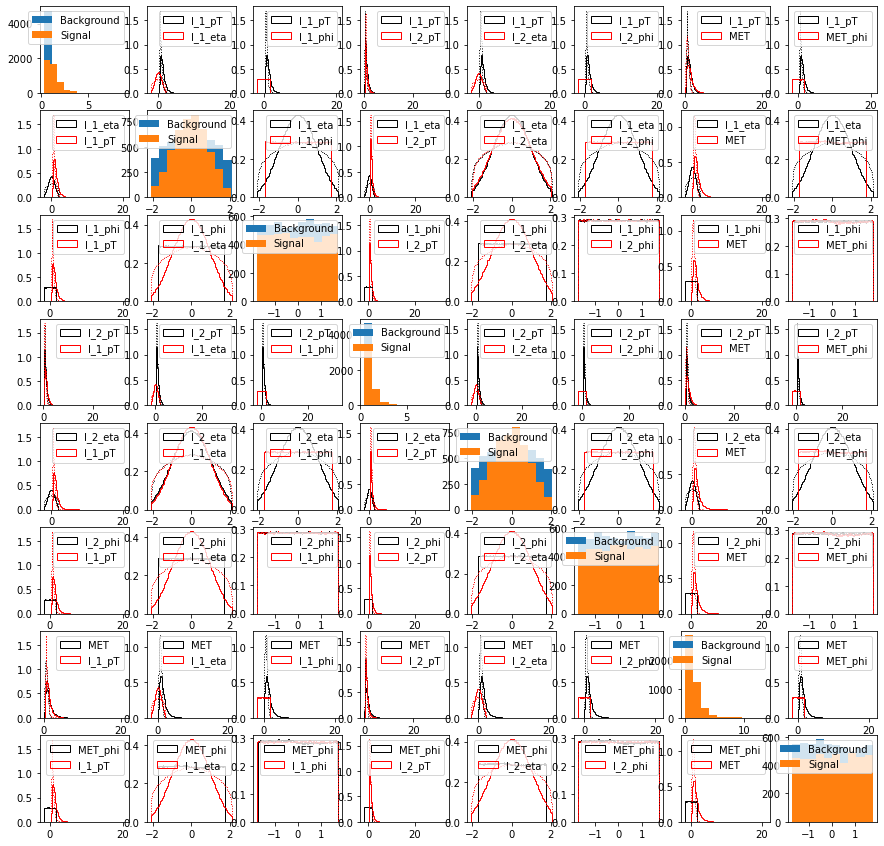

In [16]:
#Low-Level Features
pairplot(df, RawNames)

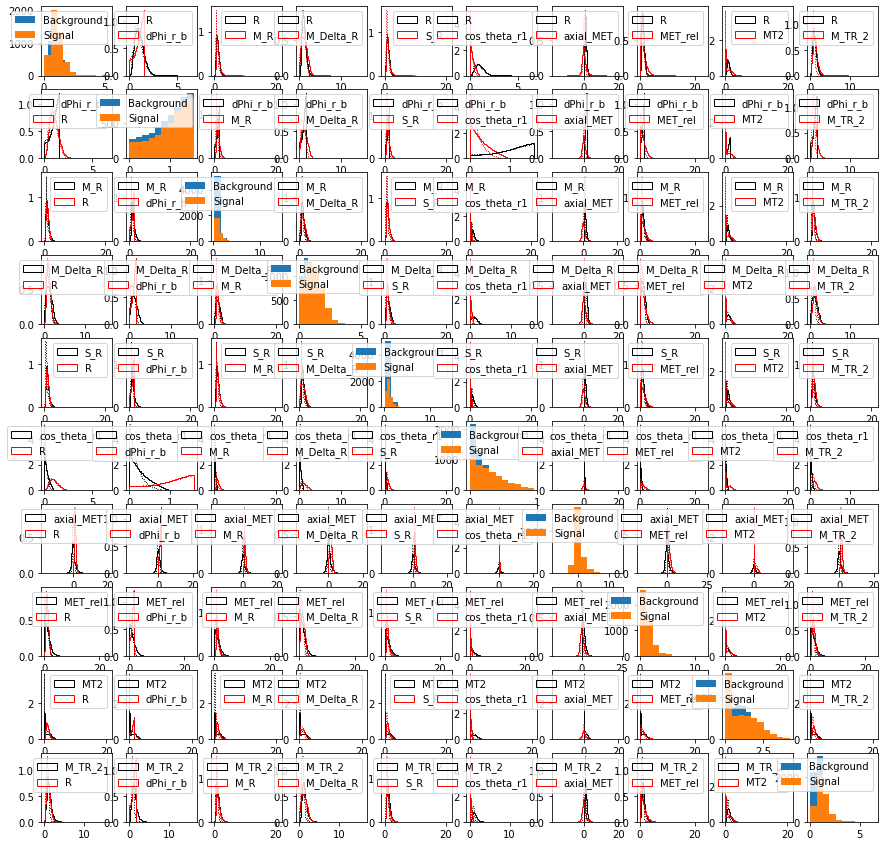

In [17]:
#High-Level Features
pairplot(df, FeatureNames)

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

Hint: Example code for embedding a `tabulate` table into a notebook:

In [18]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


In [19]:
#part d, part b and c will be embedded within this function

def compare_relation(df, col, type="cov"):
    if type=="cov":
        table=np.cov(df, rowvar=False).tolist()
        for i in range(len(table)): table[i].insert(0, col[i])
        return tabulate.tabulate(table, tablefmt="html", headers=col)
    elif type=="corrcoef":
        table=np.corrcoef(df, rowvar=False).tolist()
        for i in range(len(table)): table[i].insert(0, col[i])
        return tabulate.tabulate(table, tablefmt="html", headers=col)
    else:
        return "invalid type"

In [20]:
#Pre-define variables
sub_df=df.head(10000) #work with sample df
df_high=sub_df[FeatureNames] #sample df of High-Level Features
df_low=sub_df[RawNames] #sample df of Low-Level Features

In [21]:
#Low-Level Features Covariance
compare_relation(df_low, RawNames, type="cov")

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,0.460858,-0.00418887,-0.00137079,0.294436,0.00958541,0.00381466,0.240183,-0.00352828
l_1_eta,-0.00418887,1.00532,0.00176701,-0.0078539,0.401749,-0.00991886,-0.00405443,-0.00487734
l_1_phi,-0.00137079,0.00176701,1.00827,0.00638461,0.00117765,-0.26708,-0.0106857,-0.183609
l_2_pT,0.294436,-0.0078539,0.00638461,0.411645,0.00673714,-0.00860988,0.0887261,-0.00425625
l_2_eta,0.00958541,0.401749,0.00117765,0.00673714,1.00844,-0.00336057,0.00360387,-0.013826
l_2_phi,0.00381466,-0.00991886,-0.26708,-0.00860988,-0.00336057,0.99862,0.0052874,-0.033386
MET,0.240183,-0.00405443,-0.0106857,0.0887261,0.00360387,0.0052874,0.844474,0.0123674
MET_phi,-0.00352828,-0.00487734,-0.183609,-0.00425625,-0.013826,-0.033386,0.0123674,1.0035


In [22]:
#Low-Level Features Correlation
compare_relation(df_low, RawNames, type="corrcoef")

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,1,-0.00615407,-0.00201094,0.676,0.0140606,0.00562306,0.385004,-0.00518827
l_1_eta,-0.00615407,1,0.00175508,-0.0122088,0.399006,-0.00989943,-0.00440033,-0.00485595
l_1_phi,-0.00201094,0.00175508,1,0.00991024,0.0011679,-0.266166,-0.0115803,-0.182535
l_2_pT,0.676,-0.0122088,0.00991024,1,0.0104566,-0.0134288,0.150486,-0.00662229
l_2_eta,0.0140606,0.399006,0.0011679,0.0104566,1,-0.0033488,0.00390528,-0.0137441
l_2_phi,0.00562306,-0.00989943,-0.266166,-0.0134288,-0.0033488,1,0.00575769,-0.0333508
MET,0.385004,-0.00440033,-0.0115803,0.150486,0.00390528,0.00575769,1,0.0134347
MET_phi,-0.00518827,-0.00485595,-0.182535,-0.00662229,-0.0137441,-0.0333508,0.0134347,1


In [23]:
#High-Level Features Covariance
compare_relation(df_high, FeatureNames, type="cov")

,R,dPhi_r_b,M_R,M_Delta_R,S_R,cos_theta_r1,axial_MET,MET_rel,MT2,M_TR_2
R,0.2244,0.0860049,-0.112636,0.163815,-0.0820159,0.0588578,-0.188792,0.247642,0.231913,0.105649
dPhi_r_b,0.0860049,0.191528,-0.02221,0.0430602,0.00441796,0.00912135,-0.0282134,0.14972,0.019395,0.0626079
M_R,-0.112636,-0.02221,0.40185,0.0814464,0.389839,-0.0147809,0.0234859,0.0511766,-0.0338709,0.213275
M_Delta_R,0.163815,0.0430602,0.0814464,0.388418,0.103416,0.0391529,-0.219806,0.411801,0.419803,0.246363
S_R,-0.0820159,0.00441796,0.389839,0.103416,0.393243,-0.0108091,-0.037946,0.090603,-0.00846702,0.233243
cos_theta_r1,0.0588578,0.00912135,-0.0147809,0.0391529,-0.0108091,0.0397094,-0.0538087,0.0554861,0.044218,0.0521526
axial_MET,-0.188792,-0.0282134,0.0234859,-0.219806,-0.037946,-0.0538087,1.0909,-0.10336,-0.4669,-0.180339
MET_rel,0.247642,0.14972,0.0511766,0.411801,0.090603,0.0554861,-0.10336,0.798486,0.394666,0.306928
MT2,0.231913,0.019395,-0.0338709,0.419803,-0.00846702,0.044218,-0.4669,0.394666,0.71726,0.185913
M_TR_2,0.105649,0.0626079,0.213275,0.246363,0.233243,0.0521526,-0.180339,0.306928,0.185913,0.343128


In [24]:
#High-Level Features Correlation
compare_relation(df_high, FeatureNames, type="corrcoef")

,R,dPhi_r_b,M_R,M_Delta_R,S_R,cos_theta_r1,axial_MET,MET_rel,MT2,M_TR_2
R,1,0.414855,-0.37509,0.554871,-0.276093,0.623513,-0.381575,0.58503,0.578064,0.380739
dPhi_r_b,0.414855,1,-0.0800573,0.157874,0.0160981,0.104592,-0.0617232,0.382852,0.0523281,0.244223
M_R,-0.37509,-0.0800573,1,0.206153,0.98067,-0.117009,0.0354718,0.0903453,-0.0630895,0.574355
M_Delta_R,0.554871,0.157874,0.206153,1,0.26461,0.315258,-0.337674,0.739441,0.795349,0.674836
S_R,-0.276093,0.0160981,0.98067,0.26461,1,-0.0864994,-0.0579354,0.161688,-0.0159427,0.634966
cos_theta_r1,0.623513,0.104592,-0.117009,0.315258,-0.0864994,1,-0.258532,0.311604,0.262008,0.446788
axial_MET,-0.381575,-0.0617232,0.0354718,-0.337674,-0.0579354,-0.258532,1,-0.110746,-0.52783,-0.294761
MET_rel,0.58503,0.382852,0.0903453,0.739441,0.161688,0.311604,-0.110746,1,0.521504,0.586375
MT2,0.578064,0.0523281,-0.0630895,0.795349,-0.0159427,0.262008,-0.52783,0.521504,1,0.374751
M_TR_2,0.380739,0.244223,0.574355,0.674836,0.634966,0.446788,-0.294761,0.586375,0.374751,1


## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

In [ ]:
#5.1
#X>Xc is the most optimal

In [27]:
#5.2 -- initializing figure settings (code from lecture 16)

def PR_plot(df, var):
    plt.figure(figsize=(10,5))
    plt.title(var)
    TPR,bins_sig,_=plt.hist(df[var],bins=100,histtype="step",cumulative=-1,density=True)

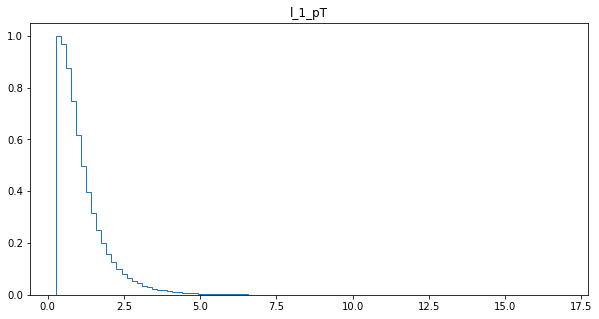

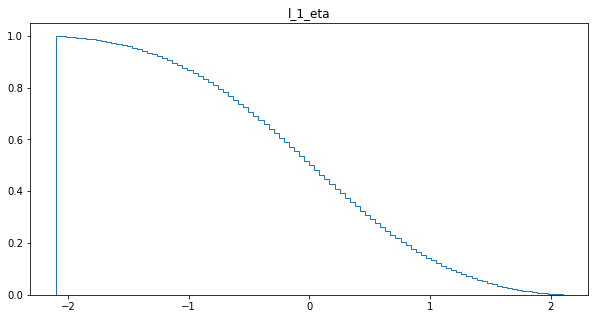

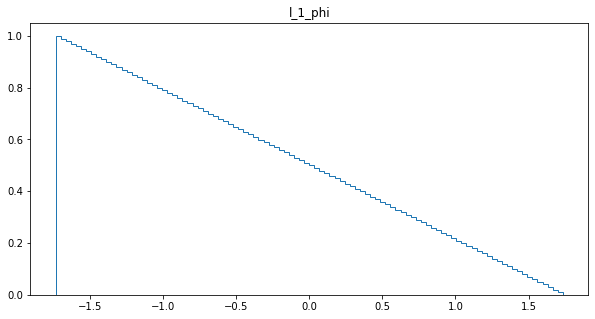

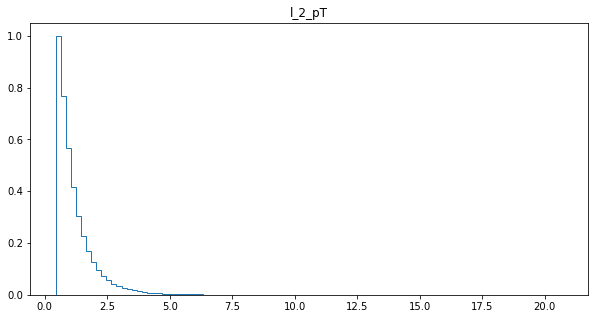

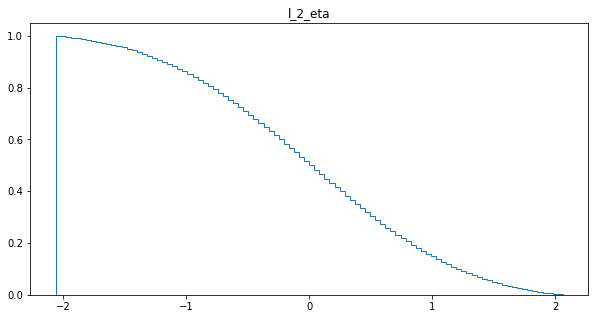

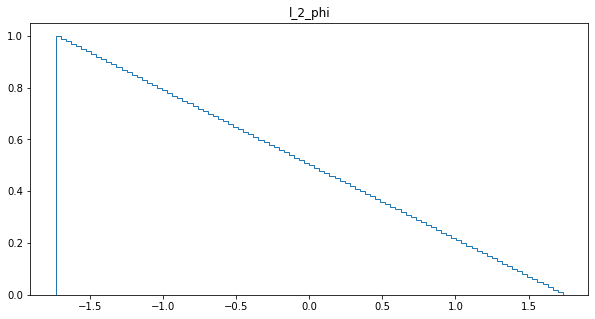

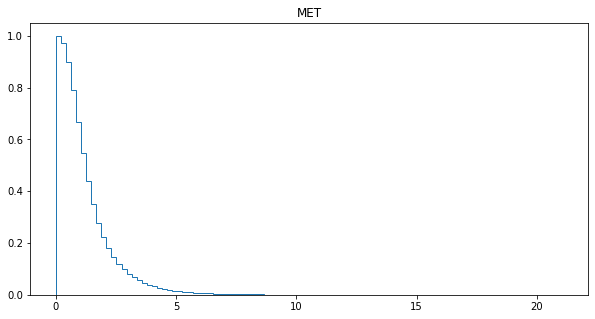

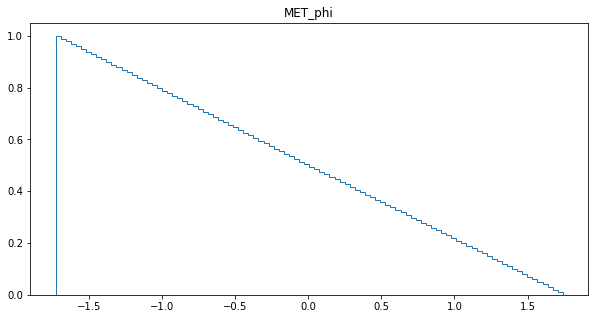

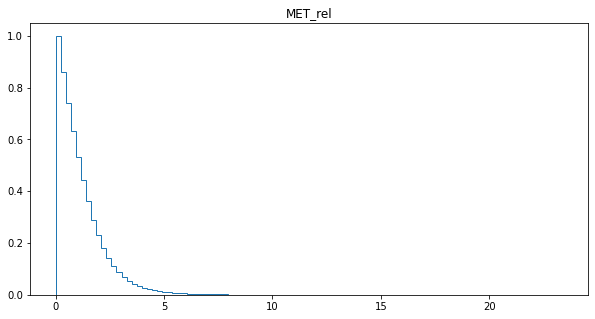

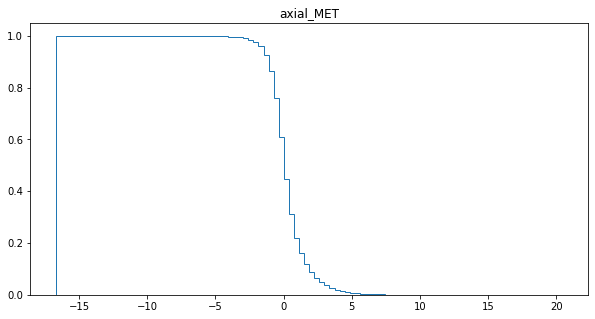

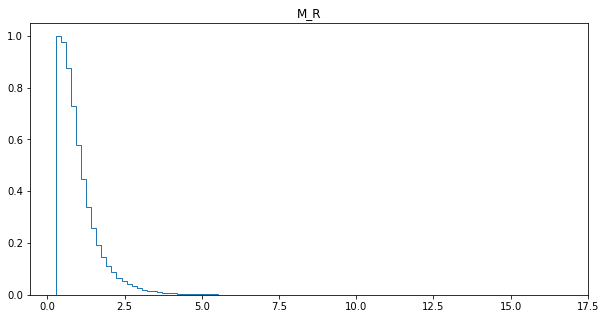

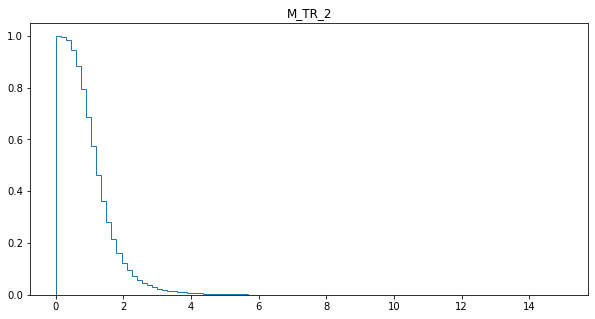

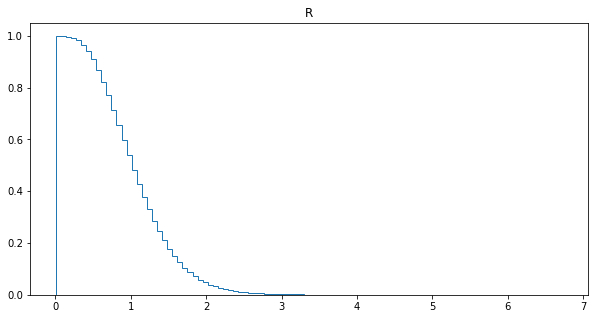

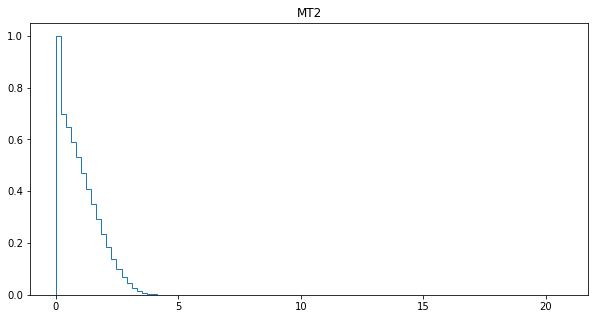

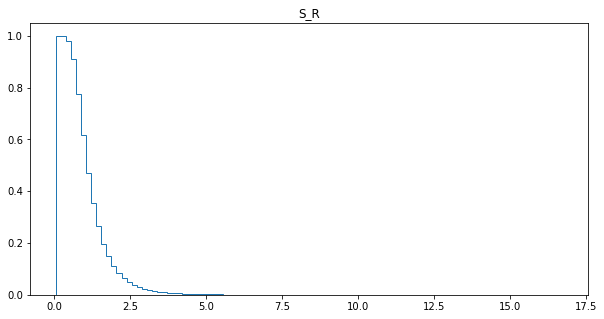

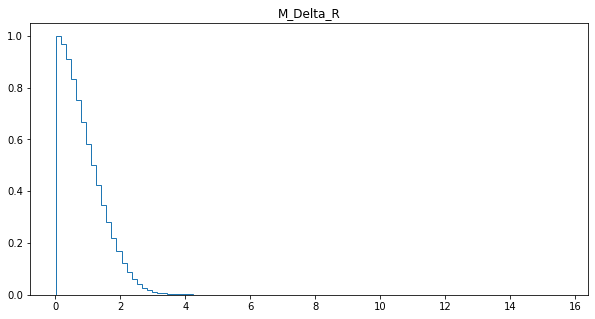

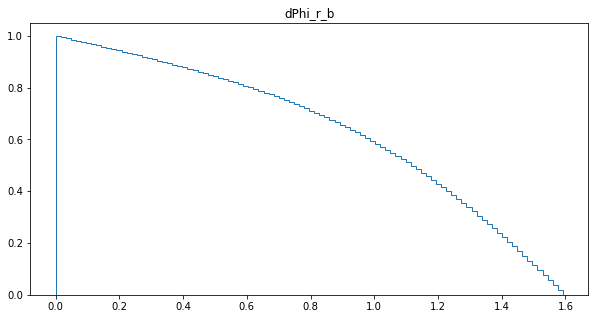

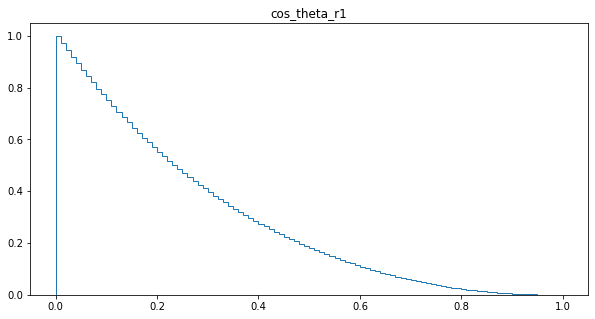

In [28]:
#5.2 -- TPR Plot (code from lecture 16)
for name in VarNames[1:]:
    PR_plot(df_sig, name)

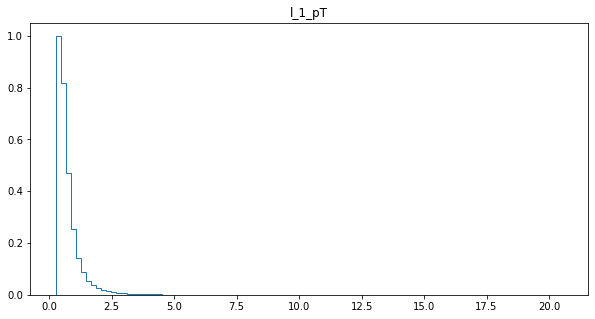

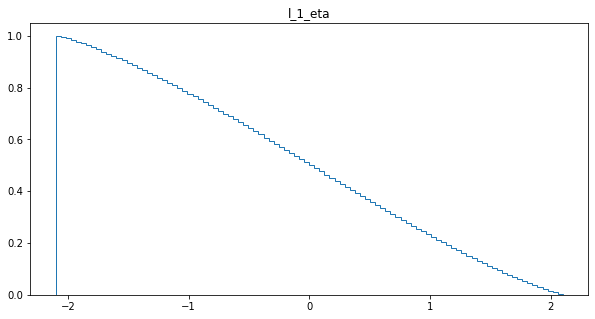

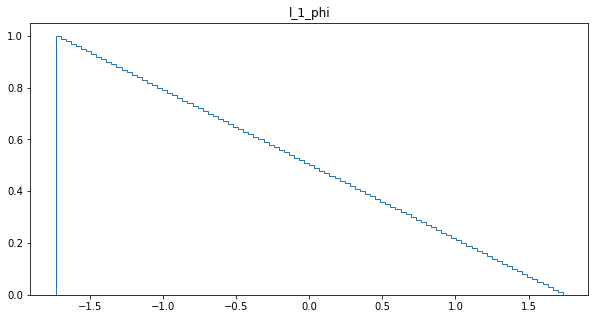

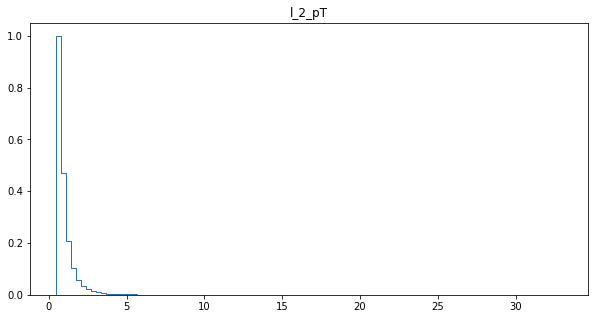

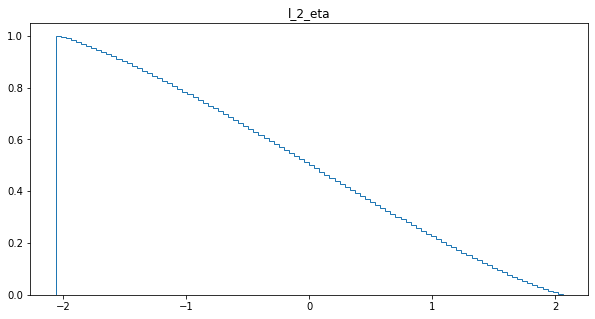

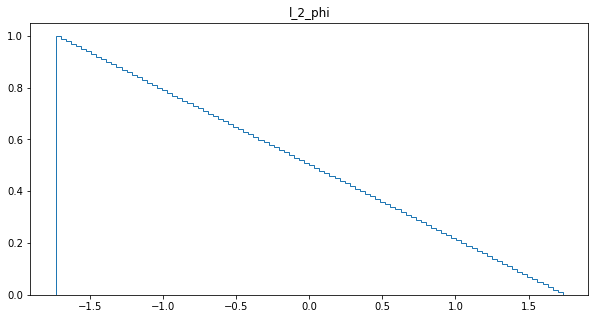

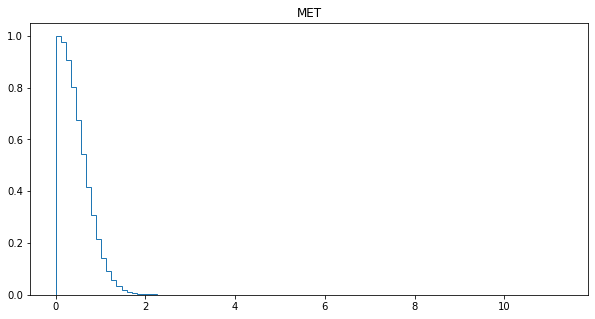

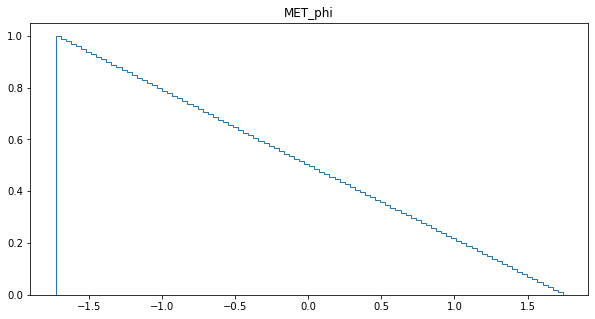

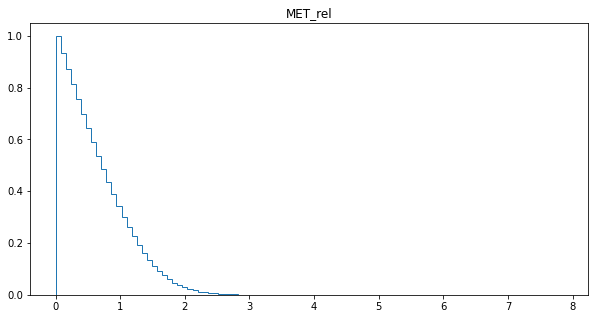

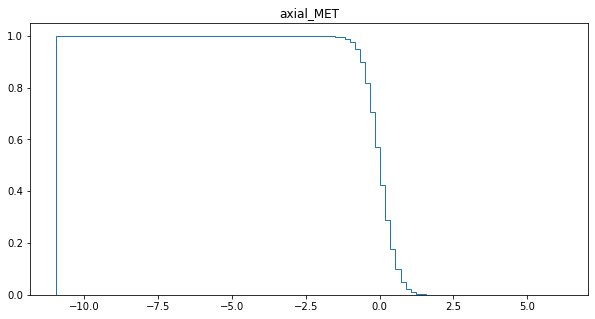

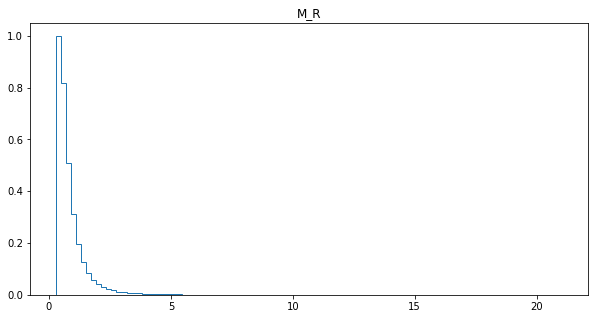

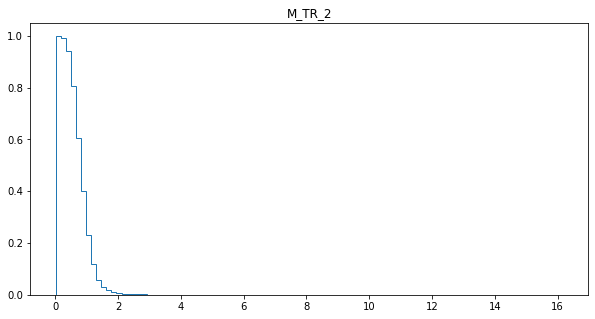

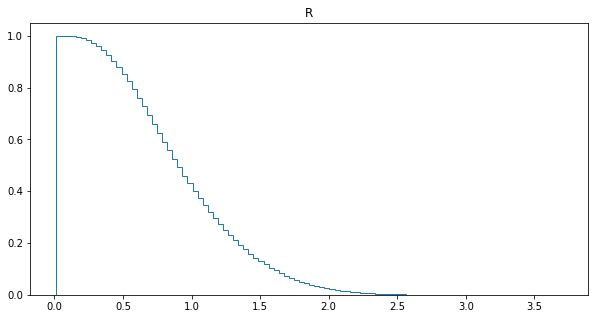

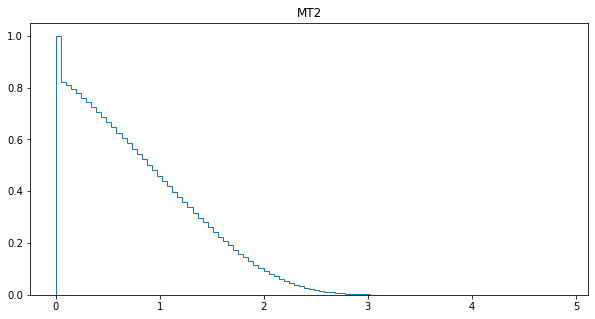

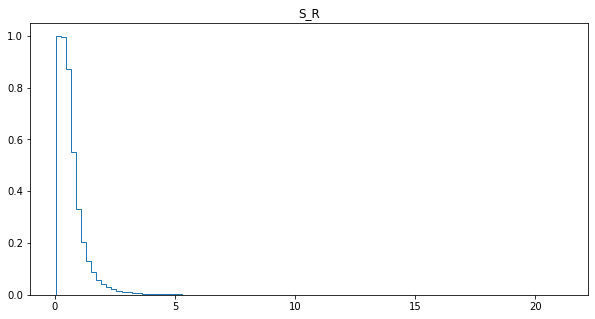

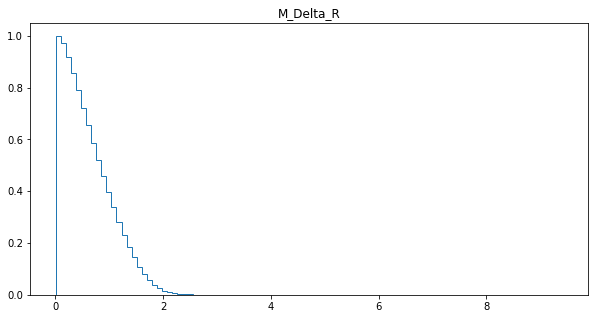

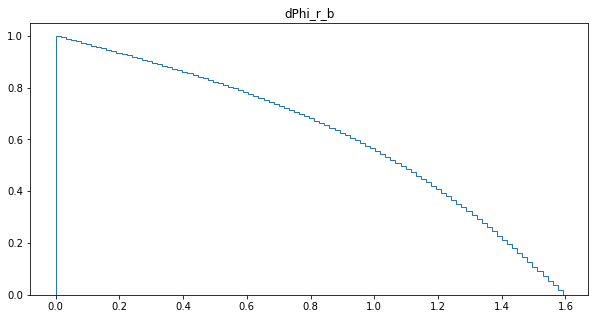

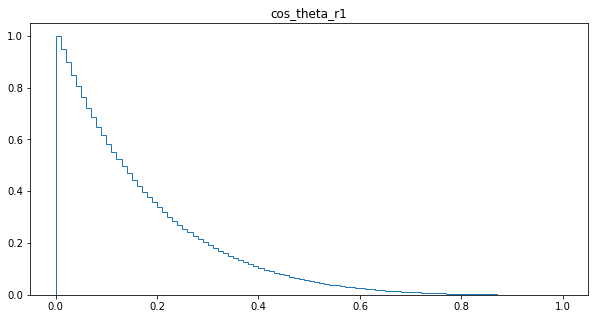

In [29]:
#5.2 FPR Plot (code from lecture 16)
for name in VarNames[1:]:
    PR_plot(df_bkg, name)

In [33]:
#5.3 Generalized function plot for any observables (code from lecture 16)

def compute_rate(d,bins=100):
    hist,bins_=np.histogram(d,bins=bins,density=True)
    R = np.cumsum(hist[::-1])[::-1] * (bins_[1]-bins_[0])
    return R,bins_

In [34]:
#5.3 Compute significance function (code from lecture 16)

def compare_significance(df_sig, df_bkg,
                         obs_name,
                         scenarios,bins=100,log=False):
        
    TPR,bins_sig = compute_rate(df_sig[obs_name],bins=bins)
    FPR,bins_sig = compute_rate(df_bkg[obs_name],bins=bins_sig)
    
    max_sigs=dict()
    table=list()
    
    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name+" "+str((n_sig_expected, n_bkg_expected)))
    
        max_i=np.argmax(sig)
        max_sigs[name]=(max_i,n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i])
        table.append((name,n_sig_expected, n_bkg_expected, 
                      TPR[max_i],FPR[max_i],
                      n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i],max_i)
        )
    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()
    
    display(HTML(tabulate.tabulate(table, tablefmt='html',
                                   headers=["Name",'N sig','N bkg',"TPR","FPR","N sig'","N bkg'",'sig','x_c',"bin i"])))
    return max_sigs

MET


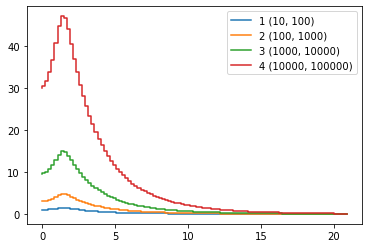

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.349463,0.0198365,3.49463,1.98365,1.49307,1.47506,7
2,100,1000,0.349463,0.0198365,34.9463,19.8365,4.72149,1.47506,7
3,1000,10000,0.349463,0.0198365,349.463,198.365,14.9307,1.47506,7
4,10000,100000,0.349463,0.0198365,3494.63,1983.65,47.2149,1.47506,7


MET_phi


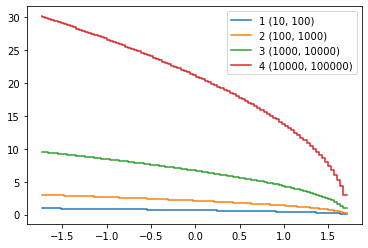

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,-1.72712,0
2,100,1000,1,1,100,1000,3.01511,-1.72712,0
3,1000,10000,1,1,1000,10000,9.53463,-1.72712,0
4,10000,100000,1,1,10000,100000,30.1511,-1.72712,0


MET_rel


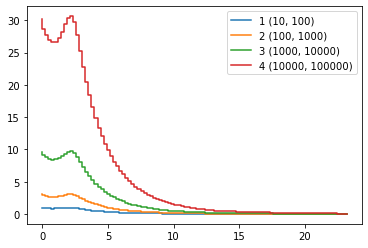

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.142159,0.00731554,1.42159,0.731554,0.96881,2.33864,10
2,100,1000,0.142159,0.00731554,14.2159,7.31554,3.06365,2.33864,10
3,1000,10000,0.142159,0.00731554,142.159,73.1554,9.6881,2.33864,10
4,10000,100000,0.142159,0.00731554,1421.59,731.554,30.6365,2.33864,10


axial_MET


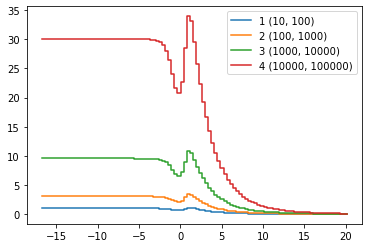

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.160196,0.00620536,1.60196,0.620536,1.07456,1.1405,48
2,100,1000,0.160196,0.00620536,16.0196,6.20536,3.39806,1.1405,48
3,1000,10000,0.160196,0.00620536,160.196,62.0536,10.7456,1.1405,48
4,10000,100000,0.160196,0.00620536,1601.96,620.536,33.9806,1.1405,48


M_R


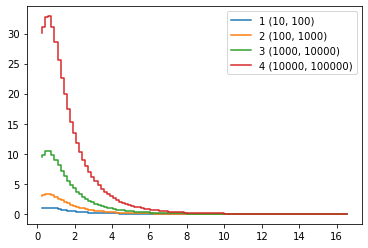

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.731022,0.421495,7.31022,42.1495,1.03945,0.76074,3
2,100,1000,0.731022,0.421495,73.1022,421.495,3.28704,0.76074,3
3,1000,10000,0.731022,0.421495,731.022,4214.95,10.3945,0.76074,3
4,10000,100000,0.731022,0.421495,7310.22,42149.5,32.8704,0.76074,3


M_TR_2


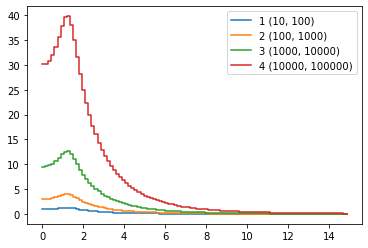

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.363213,0.0469801,3.63213,4.69801,1.25845,1.35029,9
2,100,1000,0.363213,0.0469801,36.3213,46.9801,3.97956,1.35029,9
3,1000,10000,0.363213,0.0469801,363.213,469.801,12.5845,1.35029,9
4,10000,100000,0.363213,0.0469801,3632.13,4698.01,39.7956,1.35029,9


R


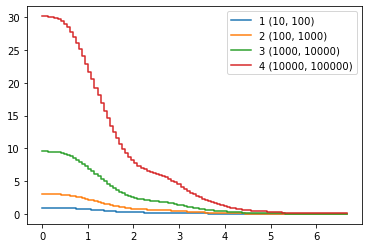

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0.00204808,0
2,100,1000,1,1,100,1000,3.01511,0.00204808,0
3,1000,10000,1,1,1000,10000,9.53463,0.00204808,0
4,10000,100000,1,1,10000,100000,30.1511,0.00204808,0


MT2


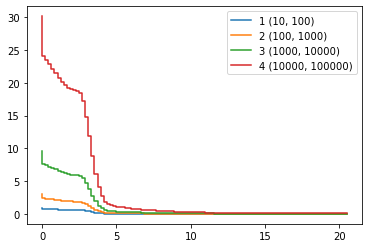

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0,0
2,100,1000,1,1,100,1000,3.01511,0,0
3,1000,10000,1,1,1000,10000,9.53463,0,0
4,10000,100000,1,1,10000,100000,30.1511,0,0


S_R


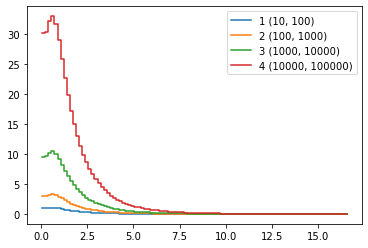

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.777207,0.477283,7.77207,47.7283,1.04325,0.719131,4
2,100,1000,0.777207,0.477283,77.7207,477.283,3.29905,0.719131,4
3,1000,10000,0.777207,0.477283,777.207,4772.83,10.4325,0.719131,4
4,10000,100000,0.777207,0.477283,7772.07,47728.3,32.9905,0.719131,4


M_Delta_R


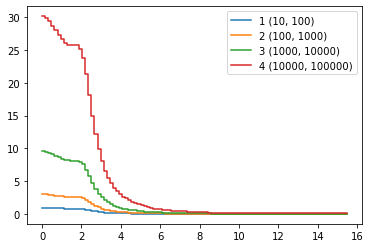

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0.00445562,0
2,100,1000,1,1,100,1000,3.01511,0.00445562,0
3,1000,10000,1,1,1000,10000,9.53463,0.00445562,0
4,10000,100000,1,1,10000,100000,30.1511,0.00445562,0


dPhi_r_b


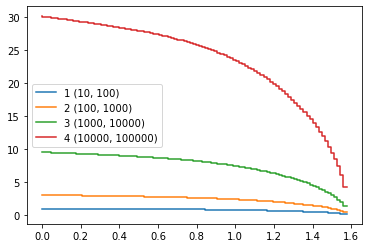

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,2.45273e-06,0
2,100,1000,1,1,100,1000,3.01511,2.45273e-06,0
3,1000,10000,1,1,1000,10000,9.53463,2.45273e-06,0
4,10000,100000,1,1,10000,100000,30.1511,2.45273e-06,0


cos_theta_r1


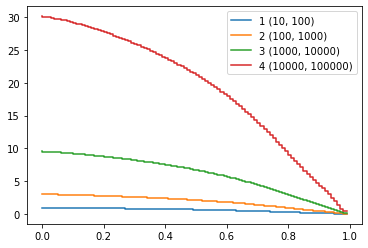

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,1.50257e-07,0
2,100,1000,1,1,100,1000,3.01511,1.50257e-07,0
3,1000,10000,1,1,1000,10000,9.53463,1.50257e-07,0
4,10000,100000,1,1,10000,100000,30.1511,1.50257e-07,0


In [36]:
#5.3 observables and scenerios (code fromlecture 16)

scenarios = { "1": (10,100), 
              "2": (100,1000),
              "3": (1000,10000),
              "4": (10000,100000)
            }

my_obs= ['MET',
 'MET_phi',
 'MET_rel',
 'axial_MET',
 'M_R',
 'M_TR_2',
 'R',
 'MT2',
 'S_R',
 'M_Delta_R',
 'dPhi_r_b',
 'cos_theta_r1']

for obs in my_obs:
    print(obs)
    _=compare_significance(df_sig,df_bkg,obs,scenarios)

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [49]:
#6.1 (code from lecture 16)

sub_obs= ['MET',
 'R',
 'MT2']

df_sig_1 = df_sig[df_sig["MET"]>1.35029]
df_bkg_1 = df_bkg[df_bkg["MET"]>1.35029]
print(df_sig_1.shape)
print(df_bkg_1.shape)

eff_s = df_sig_1.shape[0]/df_sig.shape[0]
eff_b = df_bkg_1.shape[0]/df_bkg.shape[0]
print(eff_s,eff_b)

scenarios_1 =dict(zip(scenarios.keys(),map(lambda x: (eff_s*x[0],eff_b*x[1]),scenarios.values())))
scenarios_1

(916089, 19)
(96209, 19)
0.40041882537447104 0.03547303214064885


{'1': (4.004188253744711, 3.547303214064885),
 '2': (40.0418825374471, 35.47303214064885),
 '3': (400.41882537447106, 354.7303214064885),
 '4': (4004.1882537447104, 3547.3032140648847)}

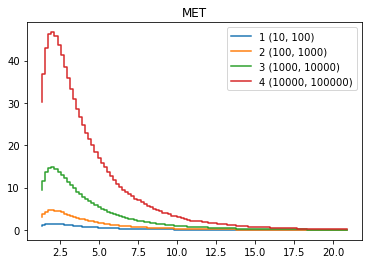

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.434747,0.0432704,4.34747,4.32704,1.47609,2.13904,4
2,100,1000,0.434747,0.0432704,43.4747,43.2704,4.66782,2.13904,4
3,1000,10000,0.434747,0.0432704,434.747,432.704,14.7609,2.13904,4
4,10000,100000,0.434747,0.0432704,4347.47,4327.04,46.6782,2.13904,4


TypeError: '>' not supported between instances of 'float' and 'dict'

In [50]:
#6.2 (code from lecture 17)

def selections(df_sig, df_bkg, var, xc, scenarios, sel=1):
    if sel==1:
        df_sig_1 = df_sig[df_sig[var]>xc]
        df_bkg_1 = df_bkg[df_bkg[var]>xc]
        eff_s = df_sig_1.shape[0]/df_sig.shape[0]
        eff_b = df_bkg_1.shape[0]/df_bkg.shape[0]
    elif sel==2:
        df_sig_1 = df_sig[df_sig[var]<xc]
        df_bkg_1 = df_bkg[df_bkg[var]<xc]
        eff_s = df_sig_1.shape[0]/df_sig.shape[0]
        eff_b = df_bkg_1.shape[0]/df_bkg.shape[0]
    elif sel==3:
        df_sig_1 = df_sig[np.abs(df_sig[var]-1.1)>xc]
        df_bkg_1 = df_bkg[np.abs(df_bkg[var]-1.1)>xc]
        eff_s = df_sig_1.shape[0]/df_sig.shape[0]
        eff_b = df_bkg_1.shape[0]/df_bkg.shape[0]
    elif sel==4:
        df_sig_1 = df_sig[np.abs(df_sig[var]-1.1)<xc]
        df_bkg_1 = df_bkg[np.abs(df_bkg[var]-1.1)<xc]
        eff_s = df_sig_1.shape[0]/df_sig.shape[0]
        eff_b = df_bkg_1.shape[0]/df_bkg.shape[0]
    return df_sig_1, df_bkg_1, eff_s, eff_b

for var in sub_obs:
    plt.title(var)
    xc=compare_significance(df_sig_1,df_bkg_1,var,scenarios)
    for x in range(1,5):
        df_sig_1, df_bkg_1, eff_s, eff_b=selections(df_sig, df_bkg, var, xc, scenarios, sel=x)
        scenarios_1=dict(zip(scenarios.keys(),map(lambda x: (eff_s*x[0],eff_b*x[1]),scenarios.values())))
        plt.title(f"selection {x}")
        max_sigs=compare_significance(df_sig_1,df_bkg_1,var,scenarios_1)

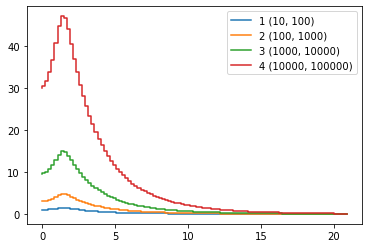

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.349463,0.0198365,3.49463,1.98365,1.49307,1.47506,7
2,100,1000,0.349463,0.0198365,34.9463,19.8365,4.72149,1.47506,7
3,1000,10000,0.349463,0.0198365,349.463,198.365,14.9307,1.47506,7
4,10000,100000,0.349463,0.0198365,3494.63,1983.65,47.2149,1.47506,7


TypeError: '>' not supported between instances of 'float' and 'dict'

In [53]:
#6.2 Apply selections 

xc=compare_significance(df_sig, df_bkg, "MET", scenarios)
df_sig_1, df_bkg_1, eff_s, eff_b=selections(df_sig, df_bkg, 'M_TR_2', xc, scenarios, sel=1)


xc=compare_significance(df_sig, df_bkg, "R", scenarios)
df_sig_2, df_bkg_2, eff_s_2, eff_b_2=selections(df_sig_1, df_bkg_1, 'l_1_pT', xc, scenarios, sel=1)


xc=compare_significance(df_sig, df_bkg, "MT2", scenarios)
df_sig_3, df_bkg_3, eff_s, eff_b=selections(df_sig_2, df_bkg_2, 'MET', xc, scenarios, sel=1)


scenarios_1 =dict(zip(scenarios.keys(),map(lambda x: (eff_s*x[0],eff_b*x[1]),scenarios.values())))
for var in VarNames[1:]:
    plt.title(var)
    max_sigs = compare_significance(df_sig, df_bkg, var, scenarios_1)

## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



In [44]:
def compute_rate_1(d,bins=100):
    hist,bins_=np.histogram(d,bins=bins,density=True)
    R = np.cumsum(hist[::-1])[::-1] * (bins_[1]-bins_[0])
    return R,bins_

def compute_rate_2(d,bins=100):
    hist,bins_=np.histogram(d,bins=bins,density=True)
    R = np.cumsum(hist) * (bins_[1]-bins_[0])
    return R,bins_

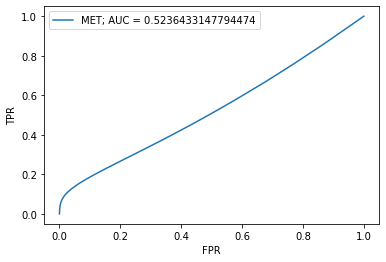

In [45]:
def ROC(df_sig, df_bkg, selections):  
    auc_vals=[] # stores AUC values to display in the legend
    for var in selections:
        TPR,bins_sig = compute_rate_1(df_sig[var], bins=100000) 
        FPR,bins_sig = compute_rate_1(df_bkg[var], bins=100000)
        n = FPR.shape[0]
        AUC=np.sum((FPR[0:n-1]-FPR[1:]) * (TPR[0:n-1]+TPR[1:])/2) # Calculates the area under the curve
        auc_vals.append(f'{var}; AUC = {AUC}') # adds the AUC value to the legend
        plt.plot(FPR, TPR) # creates the plot
        plt.ylabel("TPR")
        plt.xlabel("FPR")
    _=plt.legend(labels=auc_vals) # Prints the AUC in the legend

ROC(df_sig,df_bkg,['MET'])


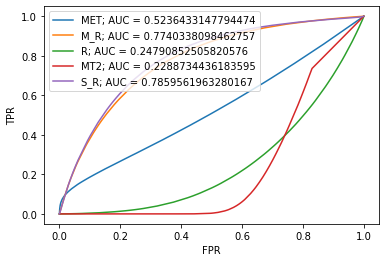

In [46]:
#7.1

ROC(df_sig,df_bkg,sub_obs)

In [47]:
#7.3 -- Lab 3 Exercise 4

import random
def generate_uniform(N,x_min,x_max):
    out = []
    ### BEGIN SOLUTION

    r = x_max-x_min
    for x in range(N): out.append(random.random()*r+x_min)      
    
    ### END SOLUTION
    return out

def histogram(x,n_bins=10,x_min=None,x_max=None):
    ### BEGIN SOLUTION

    if x_min==None:
        x_min=min(x)
    if x_max==None:
        x_max=max(x)

    bin_size=(x_max-x_min)/n_bins

    hist=[0]*n_bins

    bin_edges=[]
    for i in range(len(hist)): bin_edges.append(x_min+i*bin_size)
    bin_edges.append(x_max)
    
    for val in x:
        for i in range(len(hist)):
            if val>=bin_edges[i] and val<bin_edges[i+1]:
                hist[i]+=1
                break
    
    ### END SOLUTION

    return hist,bin_edges

def draw_histogram(x,n_bins,x_min=None,x_max=None,character="#",max_character_per_line=20):
    ### BEGIN SOLUTION

    if x_min==None:
        x_min=min(x)
    if x_max==None:
        x_max=max(x)

    hist,bin_edges=histogram(x,n_bins)

    for i in range(len(hist)):
        char_count=0
        print('[{:9},{:9}'.format(round(bin_edges[i],5),round(bin_edges[i+1],5))+']',': ',end="")
        for v in range(hist[i]):
            if char_count<max_character_per_line:
                print(character,end="")
                char_count+=1
        print()
    
    ### END SOLUTION

    return hist,bin_edges

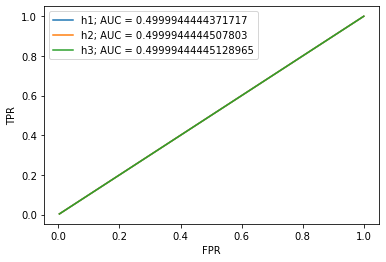

In [59]:
#7.3

h1=generate_uniform(300,10,20)
h2=generate_uniform(300,10,20)
h3=generate_uniform(300,10,20)

uni=pd.DataFrame([h1,h2,h3]).transpose()
uni.columns=['h1','h2','h3']

ROC(uni,uni,uni.columns)

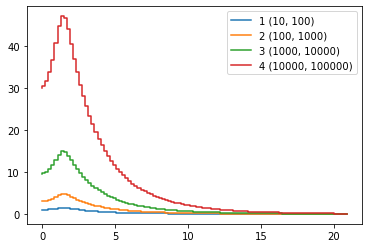

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.349463,0.0198365,3.49463,1.98365,1.49307,1.47506,7
2,100,1000,0.349463,0.0198365,34.9463,19.8365,4.72149,1.47506,7
3,1000,10000,0.349463,0.0198365,349.463,198.365,14.9307,1.47506,7
4,10000,100000,0.349463,0.0198365,3494.63,1983.65,47.2149,1.47506,7


TypeError: '>' not supported between instances of 'float' and 'dict'

In [54]:
#7.4 (Note: still encountering problem--code does not work)

xc=compare_significance(df_sig, df_bkg, "MET", scenarios)
df_sig_1, df_bkg_1, eff_s, eff_b=selections(df_sig, df_bkg, 'M_TR_2', xc, scenarios, sel=1)


xc=compare_significance(df_sig, df_bkg, "R", scenarios)
df_sig_2, df_bkg_2, eff_s_2, eff_b_2=selections(df_sig_1, df_bkg_1, 'l_1_pT', xc, scenarios, sel=1)


xc=compare_significance(df_sig, df_bkg, "MT2", scenarios)
df_sig_3, df_bkg_3, eff_s, eff_b=selections(df_sig_2, df_bkg_2, 'MET', xc, scenarios, sel=1)


scenarios_1 =dict(zip(scenarios.keys(),map(lambda x: (eff_s*x[0],eff_b*x[1]),scenarios.values())))

ROC(df_sig_3, df_bkg_3, observables)

## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 

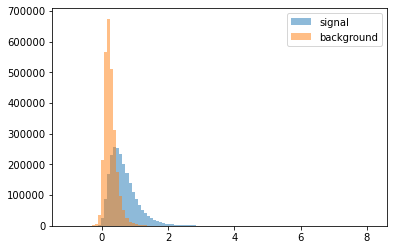

In [55]:
#8.1 (code from lecture 17)

df_sig_0 = df_sig.drop("signal",axis=1)
df_bkg_0 = df_bkg.drop("signal",axis=1)


m_s= np.mean(df_sig_0,axis=0)
m_b= np.mean(df_bkg_0,axis=0)


delta=np.matrix(m_s-m_b).transpose()
S_B= delta*delta.transpose()


delta_s=np.matrix(df_sig_0-m_s).transpose()
S_W_s= delta_s*delta_s.transpose()


delta_b=np.matrix(df_bkg_0-m_b).transpose()
S_W_b= delta_b*delta_b.transpose()


S_W=S_W_s+S_W_b
S_W_inv = np.linalg.inv(S_W)
w = S_W_inv * np.matrix(m_b - m_s).transpose()


w_1 = w / sum(w)


output_s=np.matrix(df_sig_0)*w_1
output_b=np.matrix(df_bkg_0)*w_1


h_s,bins,_=plt.hist(output_s,label="signal",alpha=0.5,bins=100)
h_b,bins,_=plt.hist(output_b,bins=bins,alpha=0.5,label="background")
plt.legend()

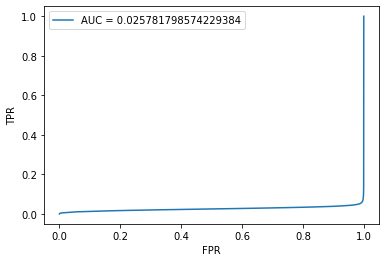

In [56]:
#8.2 ROC (code from lecture 17)

TPR,bins_sig = compute_rate_1(output_s, bins=1000000) 
FPR,bins_sig = compute_rate_1(output_b, bins=1000000)
n = FPR.shape[0]
AUC=np.sum((FPR[0:n-1]-FPR[1:]) * (TPR[0:n-1]+TPR[1:])/2) # Calculates the area under the curve
plt.plot(FPR, TPR)
plt.ylabel("TPR")
plt.xlabel("FPR")
_=plt.legend(labels=[f'AUC = {AUC}'])

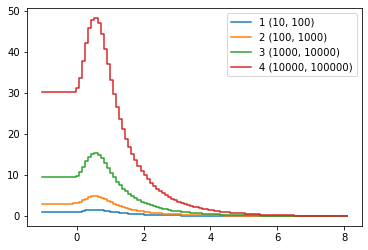

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.447442,0.0413105,4.47442,4.13105,1.52528,0.621587,18
2,100,1000,0.447442,0.0413105,44.7442,41.3105,4.82335,0.621587,18
3,1000,10000,0.447442,0.0413105,447.442,413.105,15.2528,0.621587,18
4,10000,100000,0.447442,0.0413105,4474.42,4131.05,48.2335,0.621587,18


{'1': (18,
  4.474416116253545,
  4.131053343200163,
  1.5252782829223643,
  0.6215873534238188),
 '2': (18,
  44.744161162535455,
  41.310533432001634,
  4.823353439625378,
  0.6215873534238188),
 '3': (18,
  447.44161162535454,
  413.1053343200163,
  15.252782829223644,
  0.6215873534238188),
 '4': (18,
  4474.416116253546,
  4131.053343200163,
  48.23353439625378,
  0.6215873534238188)}

In [61]:
8.3

df_s = pd.DataFrame(output_s)
df_b = pd.DataFrame(output_b)

max_sig = compare_significance(df_s, df_b, 0, scenarios)
max_sig